In [1]:
import pandas as pd
# Import the function from the src folder
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from visualization import create_bar_chart,create_line_chart,create_heat_map
from utils import get_categorical_columns,get_numerical_columns,get_boolean_columns,combine_features

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
data=pd.read_parquet("../data/processed/data_cleaned.pqt")


In [3]:
categorical_features=get_categorical_columns(data)
numerical_features=get_numerical_columns(data)
boolean_features=get_boolean_columns(data)
categorical_features

['AR',
 'payment_method',
 'client_first_lapp_mark',
 'client_first_manual_lapp_mark',
 'address_check_1',
 'address_check_2',
 'address_check_3',
 'address_check_4',
 'accounts_check_5',
 'accounts_check_6',
 'data_comparison_7',
 'data_comparison_8',
 'data_comparison_9',
 'data_comparison_10',
 'data_comparison_11',
 'data_comparison_12',
 'data_comparison_13',
 'data_comparison_14',
 'data_comparison_15',
 'creditcard_check_16',
 'creditcard_check_17',
 'creditcard_check_18',
 'data_quality_19',
 'data_quality_20',
 'other_21',
 'other_22',
 'data_quality_23',
 'data_quality_24',
 'data_quality_25',
 'data_quality_26',
 'data_quality_27',
 'data_quality_28',
 'other_29',
 'data_quality_30',
 'other_31',
 'data_quality_32',
 'data_quality_33',
 'data_quality_34',
 'data_quality_35',
 'other_36',
 'accounts_check_37',
 'accounts_check_38']

## Univariate analysis

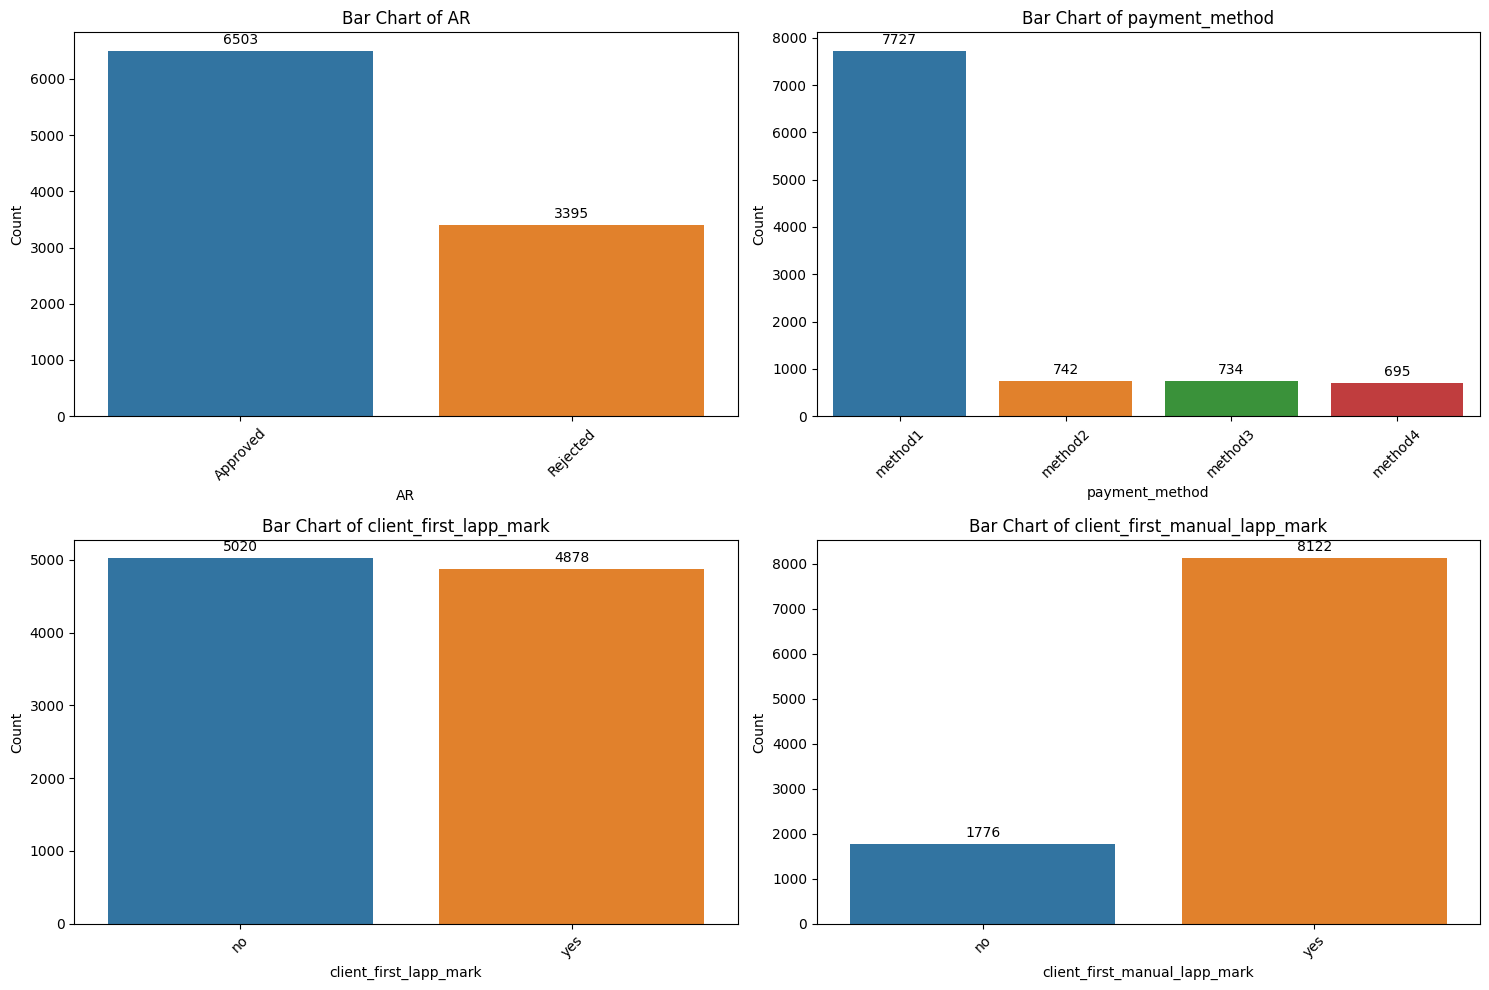

In [4]:
categories=["AR","payment_method","client_first_lapp_mark","client_first_manual_lapp_mark"]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
x=1
for i in range(0,len(categories)):
    plt.subplot(2,2,x)
    category=categories[i]
    create_bar_chart(data.copy(),category)
    x+=1

plt.savefig("../reports/figures/categorical_univariate_analysis.png")
plt.show()



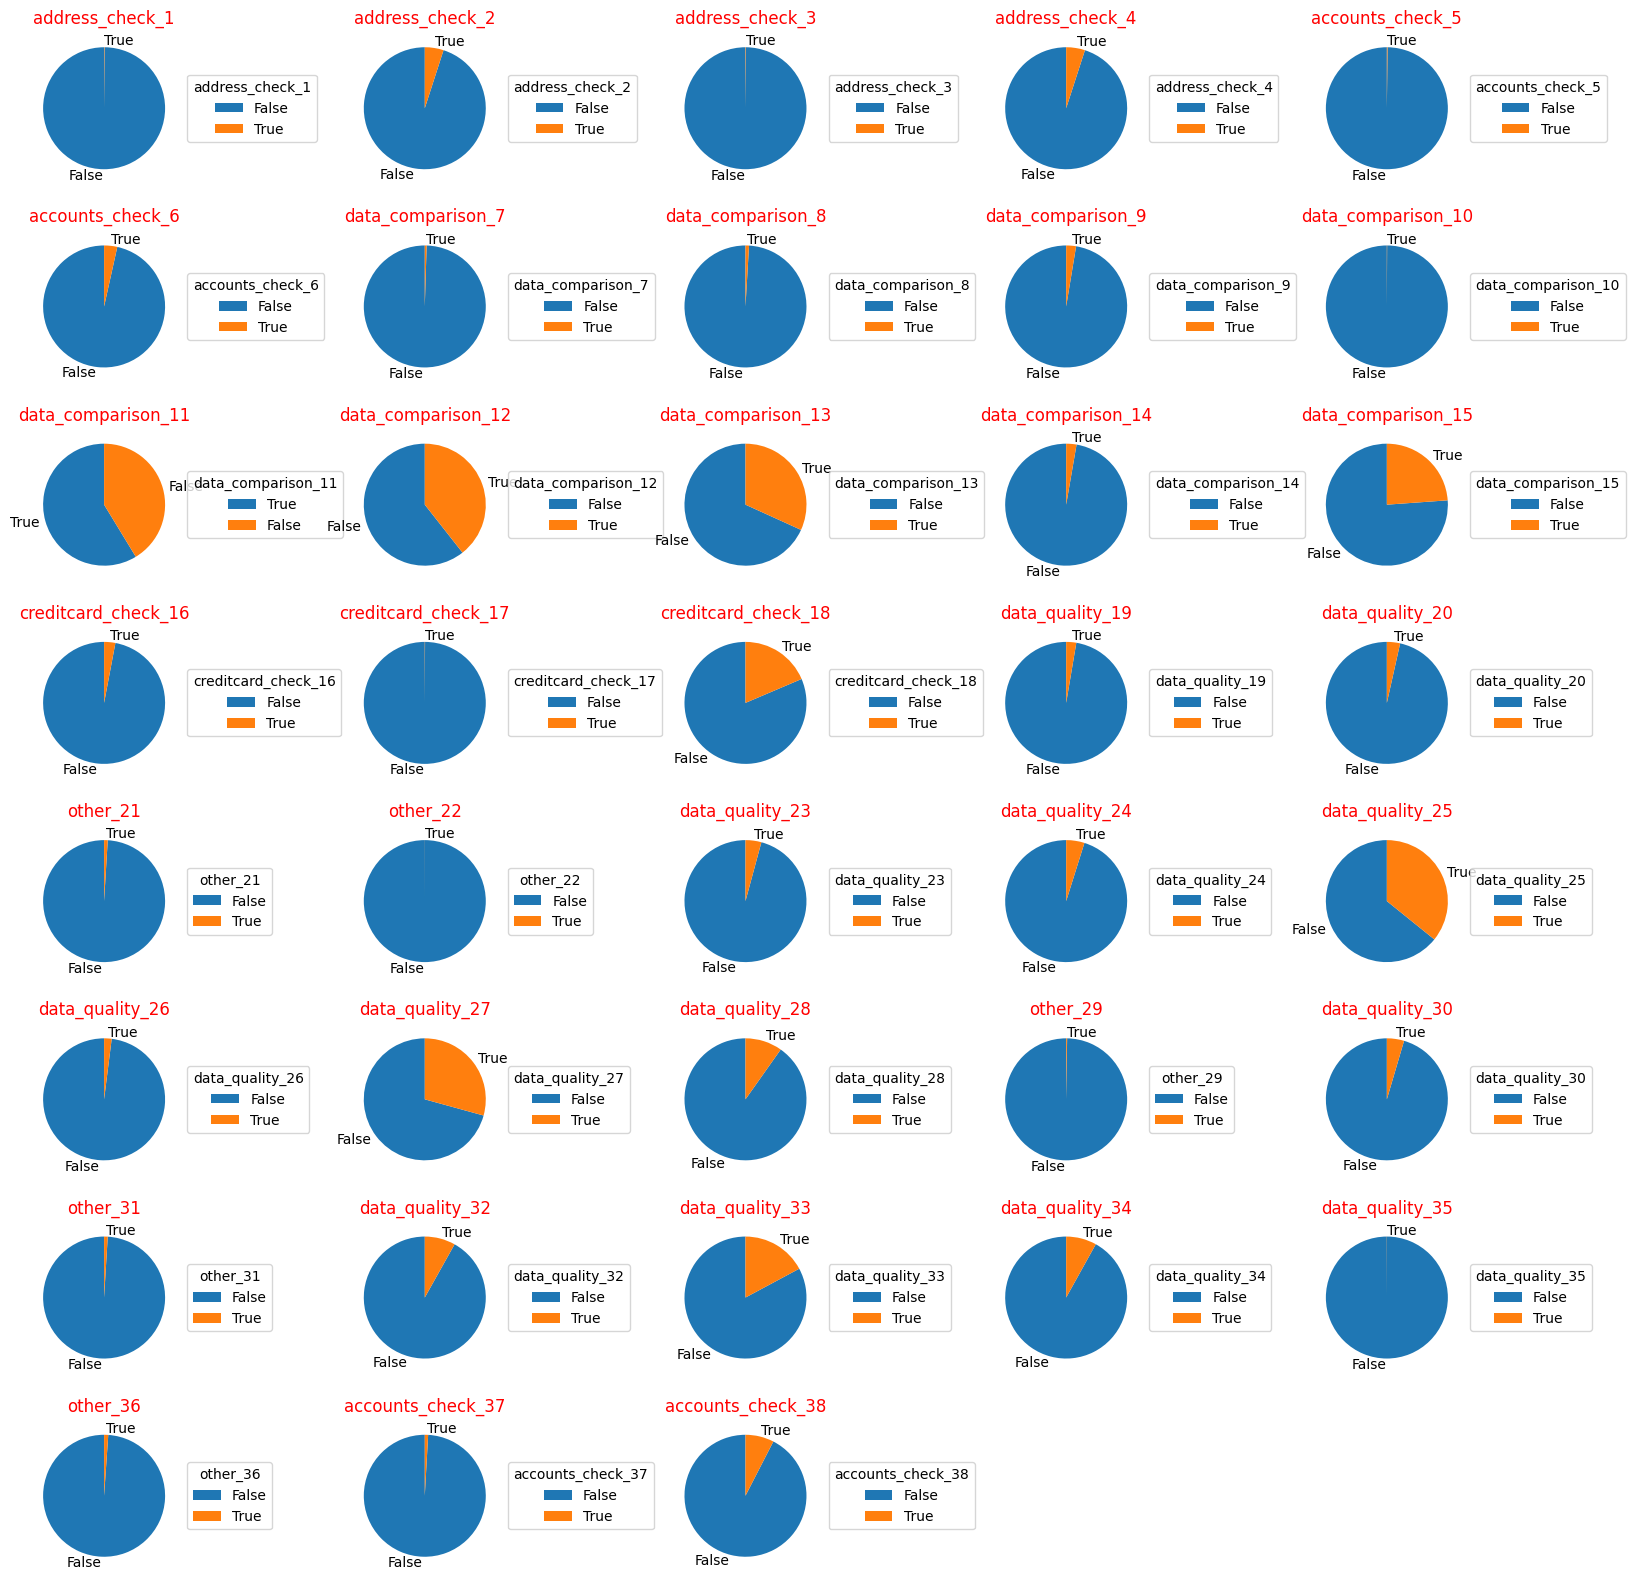

In [5]:
verified_data = data[categorical_features]
verified_data = verified_data.drop(categories, axis=1)

fig, axs = plt.subplots(nrows=8, ncols=5, figsize=(20, 20))  

axs = axs.flatten()

label_mapping = {0: 'False', 1: 'True'}

for i, flag in enumerate(verified_data.columns):
    ax = axs[i]
    data_counts = verified_data[flag].value_counts().rename(label_mapping)
    wedges, texts = ax.pie(data_counts, labels=data_counts.index, startangle=90)
    
    ax.legend(wedges, data_counts.index, title=flag, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    
    ax.set_title(flag, color='red')

# Hide any unused subplots
for j in range(len(verified_data.columns), len(axs)):
    fig.delaxes(axs[j])

plt.subplots_adjust(hspace=0.3, wspace=0.2)  # Adjust the spacing as needed
plt.savefig("../reports/figures/data_checks_univariate_analysis.png")

plt.show()

In [6]:
for category in categorical_features:
    
    print(data[category].value_counts(normalize=True)*100)
    print()
    

AR
0    65.700141
1    34.299859
Name: proportion, dtype: float64

payment_method
method1    78.066276
method2     7.496464
method3     7.415640
method4     7.021621
Name: proportion, dtype: float64

client_first_lapp_mark
no     50.717317
yes    49.282683
Name: proportion, dtype: float64

client_first_manual_lapp_mark
yes    82.056981
no     17.943019
Name: proportion, dtype: float64

address_check_1
0    99.878763
1     0.121237
Name: proportion, dtype: float64

address_check_2
0    95.029299
1     4.970701
Name: proportion, dtype: float64

address_check_3
0    99.86866
1     0.13134
Name: proportion, dtype: float64

address_check_4
0    95.019196
1     4.980804
Name: proportion, dtype: float64

accounts_check_5
0    99.818145
1     0.181855
Name: proportion, dtype: float64

accounts_check_6
0    96.52455
1     3.47545
Name: proportion, dtype: float64

data_comparison_7
0    99.515054
1     0.484946
Name: proportion, dtype: float64

data_comparison_8
0    99.070519
1     0.929481
Nam

#### Data Imbalance

##### 1. AR Data Imbalance
- **Findings:** In the dataset, `AR` indicates the approval status where `0` means approved and `1` means rejected. The distribution is as follows:
  - **Approved Applications:** 65.7% (Most common)
  - **Rejected Applications:** 34.3%

##### 2. Payment Methods Data Imbalance
- **Findings:** Payment Method 1 is the most common payment method used for loan applications. The remaining methods are used at almost equal levels. The distribution of payment methods is as follows:
  - **Payment Method 1:** 78.1% (Most common)
  - **Payment Method 2:** 7.5%
  - **Payment Method 3:** 7.4%
  - **Payment Method 4:** 7.0%

##### 3. `client_first_lapp_mark` Data Imbalance
- **Findings:** The `client_first_lapp_mark` indicates whether it is the client's first loan application. The distribution is nearly balanced between first-time and returning applicants. The distribution is as follows:
  - **First Loan Application:** 50.7% (Slightly more common)
  - **Not the First Loan Application:** 49.3%

##### 4. `client_first_manual_lapp_mark` Data Imbalance
- **Findings:** The `client_first_manual_lapp_mark` indicates whether the client's first loan application reached the manual processing stage. There are significantly more applications that reached the manual process compared to those that did not. The distribution is as follows:
  - **Reached Manual Process:** 82.1% (Most common)
  - **Did Not Reach Manual Process:** 17.9%

#### Data Check Columns Analysis

##### 1. High Proportion of `False` Values
Many boolean columns have an overwhelming majority of `False` values. For example:
- **`address_check_1`**: 99.88% `False`
- **`address_check_2`**: 95.03% `False`
- **`accounts_check_5`**: 99.82% `False`
- **`data_comparison_7`**: 99.52% `False`
- **`data_comparison_10`**: 99.93% `False`
- **`other_21`**: 99.05% `False`
- **`other_22`**: 99.98% `False`

##### 2. High Proportion of `True` Values
A few columns have a higher proportion of `True` values, indicating they might be more informative:
- **`data_comparison_11`**: 58.70% `True`
- **`data_comparison_12`**: 39.39% `True`
- **`data_comparison_13`**: 31.78% `True`
- **`data_quality_25`**: 35.81% `True`
- **`data_quality_27`**: 29.28% `True`
- **`data_quality_28`**: 9.80% `True`
- **`creditcard_check_18`**: 18.59% `True`
- **`accounts_check_38`**: 7.56% `True`

### Suggestions on Fields to Keep

Based on the proportion of `True` values, the following fields are likely to be more useful:

- **`data_comparison_11`**: Significant amount of `True` values (58.70%)
- **`data_comparison_12`**: Useful with 39.39% `True` values
- **`data_comparison_13`**: Somewhat informative with 31.78% `True` values
- **`data_quality_25`**: Relevant with 35.81% `True` values
- **`data_quality_27`**: Worth keeping with 29.28% `True` values
- **`data_quality_28`**: Potentially important with 9.80% `True` values
- **`creditcard_check_18`**: Useful for credit card analysis with 18.59% `True` values
- **`accounts_check_38`**: Relevant with 7.56% `True` values

### Fields to Consider Dropping

The following fields have a very high proportion of `False` values and may be less useful:

- **`address_check_1`**, **`address_check_2`**, **`address_check_3`**, **`address_check_4`**, **`accounts_check_5`**, **`data_comparison_7`**, **`data_comparison_8`**, **`data_comparison_9`**, **`data_comparison_10`**, **`other_21`**, **`other_22`**, **`data_quality_19`**, **`data_quality_20`**, **`other_29`**, **`data_quality_30`**, **`other_31`**, **`data_quality_32`**, **`data_quality_33`**, **`data_quality_34`**, **`data_quality_35`**, **`other_36`**, **`accounts_check_37`**.

These fields have a minimal presence of `True` values, suggesting they might not contribute significantly to the analysis.

### Summary

- **Focus** on fields with a higher proportion of `True` values as they are more likely to provide actionable insights.
- **Consider dropping** fields with an overwhelming majority of `False` values, as they might not add substantial value to the analysis.


# Combine similar data verification fields

In [7]:
address_checks=['address_check_1','address_check_2','address_check_3','address_check_4']
accounts_check=['accounts_check_37','accounts_check_38','accounts_check_5','accounts_check_6']
creditcard_check=['creditcard_check_16','creditcard_check_17','creditcard_check_18']
data_comparison_check=['data_comparison_10','data_comparison_11','data_comparison_12','data_comparison_13','data_comparison_14','data_comparison_15','data_comparison_7','data_comparison_8','data_comparison_9']
data_quality_check=['data_quality_19','data_quality_20','data_quality_23','data_quality_24','data_quality_25','data_quality_26','data_quality_27','data_quality_28','data_quality_30','data_quality_32','data_quality_33','data_quality_34','data_quality_35']
other_check=['other_21','other_22','other_29','other_31','other_36']

# Summation Fields
data['address_check_sum'] = data[address_checks].astype(int).sum(axis=1)
data['accounts_check_sum'] = data[accounts_check].astype(int).sum(axis=1)
data['creditcard_check_sum'] = data[creditcard_check].astype(int).sum(axis=1)
data['data_comparison_check_sum'] = data[data_comparison_check].astype(int).sum(axis=1)
data['data_quality_check_sum'] = data[data_quality_check].astype(int).sum(axis=1)
data['other_check_sum'] = data[other_check].astype(int).sum(axis=1)

# Combined Binary Fields

data['address_check_combined'] = data[address_checks].astype(int).max(axis=1)
data['accounts_check_combined'] = data[accounts_check].astype(int).max(axis=1)
data['creditcard_check_combined'] = data[creditcard_check].astype(int).max(axis=1)
data['data_comparison_check_combined'] = data[data_comparison_check].astype(int).max(axis=1)
data['data_quality_check_combined'] = data[data_quality_check].astype(int).max(axis=1)
data['other_check_combined'] = data[other_check].astype(int).max(axis=1)


## Drop irrelevant fields

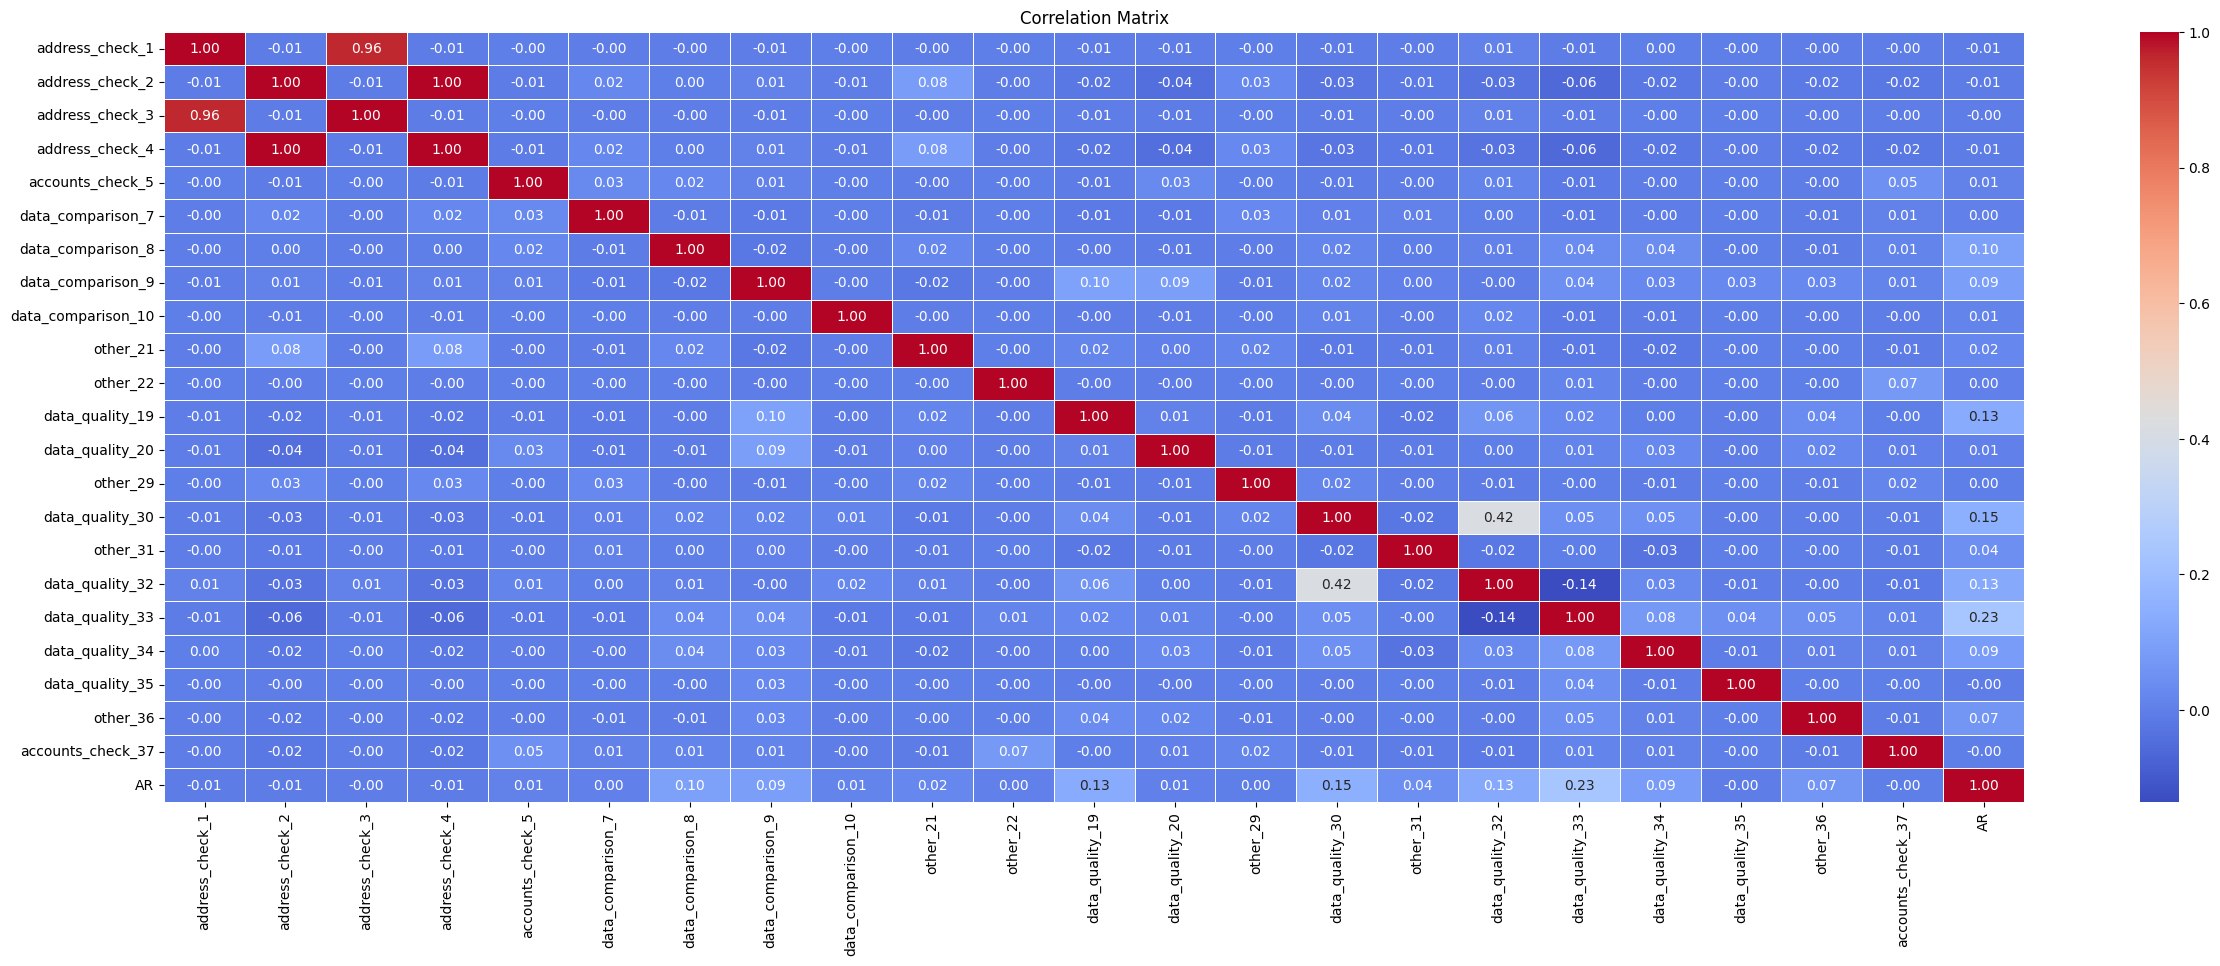

In [8]:
fields_to_drop = ["address_check_1", "address_check_2", "address_check_3", "address_check_4", "accounts_check_5", "data_comparison_7", "data_comparison_8", "data_comparison_9", "data_comparison_10", "other_21", "other_22", "data_quality_19", "data_quality_20", "other_29", "data_quality_30", "other_31", "data_quality_32", "data_quality_33", "data_quality_34", "data_quality_35", "other_36", "accounts_check_37"]
irrelevant_data=data[fields_to_drop]
irrelevant_data_corr=irrelevant_data.copy()
irrelevant_data_corr["AR"]=data["AR"]
irrelevant_data_matrix=irrelevant_data_corr.corr()
create_heat_map(irrelevant_data_matrix)
plt.show()


In [9]:
irrelevant_data_matrix["AR"].sort_values(ascending=False)

AR                    1.000000
data_quality_33       0.234368
data_quality_30       0.150335
data_quality_19       0.131360
data_quality_32       0.128722
data_comparison_8     0.098570
data_comparison_9     0.094178
data_quality_34       0.085896
other_36              0.065467
other_31              0.043356
other_21              0.023607
data_comparison_10    0.012801
accounts_check_5      0.009121
data_quality_20       0.006167
data_comparison_7     0.004706
other_22              0.004702
other_29              0.001802
accounts_check_37    -0.001917
address_check_3      -0.002697
data_quality_35      -0.003939
address_check_1      -0.006825
address_check_2      -0.007594
address_check_4      -0.007922
Name: AR, dtype: float64

#### Irrelevant Columns Correlation to Target Field

- **Findings:** From the univariate analysis, recommendations were made to drop fields with an overwhelming majority of `False` values, as they might not add substantial value to the analysis. However, some of these fields exhibit a substantial correlation with the target variable and will be kept:

  - **`data_quality_33`**: 0.23
  - **`data_quality_30`**: 0.15
  - **`data_quality_19`**: 0.13
  - **`data_quality_32`**: 0.13
  - **`data_comparison_8`**: 0.10


In [10]:
fields_to_drop = ["address_check_1", "address_check_2", "address_check_3", "address_check_4", 
                  "accounts_check_5", "data_comparison_7", "data_comparison_9", 
                  "data_comparison_10", "other_21", "other_22", "data_quality_20", 
                  "other_29", "other_31", 
                  "data_quality_34", "data_quality_35", "other_36", "accounts_check_37","data_quality_30"]
irrelevant_data=data[fields_to_drop]

data.drop(fields_to_drop, inplace = True, axis = 1)

# Multivariate analysis


## Categorical Features

/home/wangui/Documents/projects/Moneza-Loan-Approval-Automation/src/visualization.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby([split_column, category]).size().reset_index(name='Count')


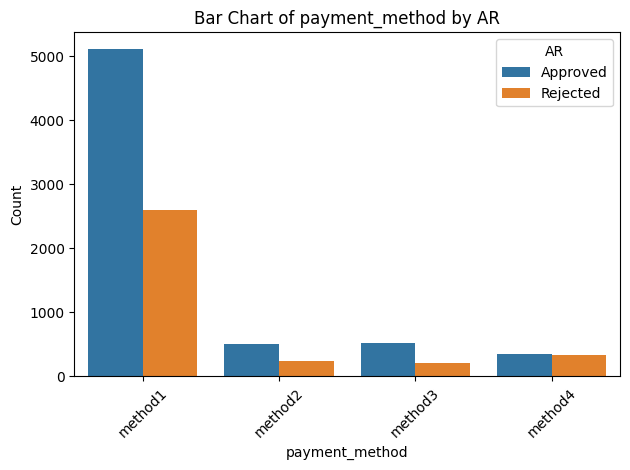

/home/wangui/Documents/projects/Moneza-Loan-Approval-Automation/src/visualization.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby([split_column, category]).size().reset_index(name='Count')


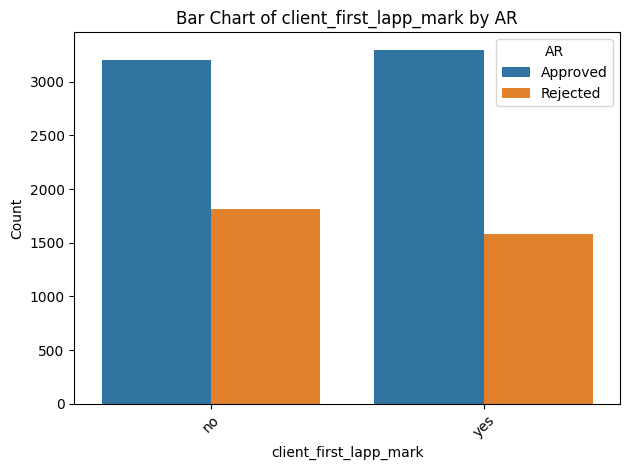

/home/wangui/Documents/projects/Moneza-Loan-Approval-Automation/src/visualization.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby([split_column, category]).size().reset_index(name='Count')


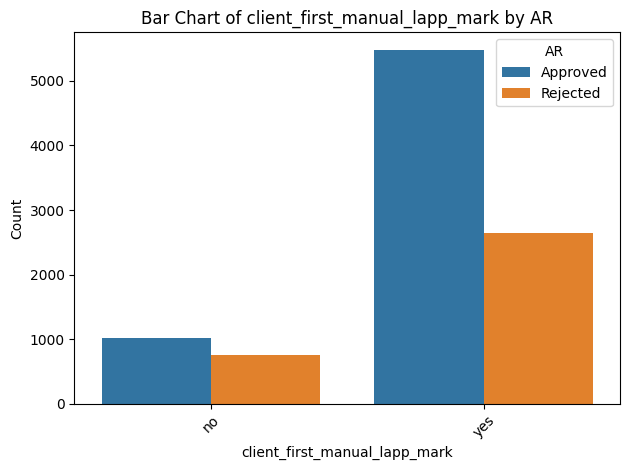

In [11]:
categorical_features=get_categorical_columns(data)

for category in categories:
    if category != "AR":
        create_bar_chart(data.copy(),category,"AR")
        plt.show()

    

### Bivariate Analysis of Categorical Variables Based on AR Target

### Payment Method
- **Findings:** Method 1 is the most commonly used payment method, with a higher number of both approved and rejected applications compared to other methods. Method 4 has the least disparity between approved and rejected applications.The distribution is as follows:
  - **Method 1:**
    - Approved: 5,120
    - Rejected: 2,607
  - **Method 2:**
    - Approved: 502
    - Rejected: 240
  - **Method 3:**
    - Approved: 524
    - Rejected: 210
  - **Method 4:**
    - Approved: 357
    - Rejected: 338

### `client_first_lapp_mark`
- **Findings:** The distribution of loan applications for first-time clients (`Yes`) and returning clients (`No`) is fairly balanced, with a slightly higher number of approvals and rejections for first-time clients. The distribution is as follows:

  - **No:**
    - Approved: 3,207
    - Rejected: 1,813
  - **Yes:**
    - Approved: 3,296
    - Rejected: 1,582
### `client_first_manual_lapp_mark`
- **Findings:**  A significant majority of applications that reached the manual processing stage for the first time (`Yes`) were approved. The number of both approved and rejected applications is substantially higher for first-time manual process applications compared to those that did not reach the manual process.The distribution is as follows:
  - **No:**
    - Approved: 1,026
    - Rejected: 750
  - **Yes:**
    - Approved: 5,477
    - Rejected: 2,645
 



## Numerical Features

In [12]:
create_line_chart(data,"warning_count","AR")

/home/wangui/Documents/projects/Moneza-Loan-Approval-Automation/src/visualization.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby([split_column, numeric_column]).size().reset_index(name='Count')


### Analysis of Numerical Variables Based on AR Target

### Warning Count
- **Findings:** The approval rate increases from 0 to 4 warning counts, with 4 warning counts having the highest number of approved loans (1,205). Beyond 4 warning counts, the number of approved loans decreases. Conversely, the number of rejected loans increases from 0 to 6 warning counts, with 6 warning counts having the highest number of rejected loans (557). Beyond 6 warning counts, the number of rejected loans decreases.


## Verification Data Features

In [13]:
verified_data = data[categorical_features]
verified_data = verified_data.drop(categories, axis=1)

for category in verified_data.columns:
    data_check=data.groupby([category,"AR"],observed=True).size().reset_index(name='Count')
    print(data_check)

  accounts_check_6 AR  Count
0                0  0   6279
1                0  1   3275
2                1  0    224
3                1  1    120
  data_comparison_8 AR  Count
0                 0  0   6487
1                 0  1   3319
2                 1  0     16
3                 1  1     76
  data_comparison_11 AR  Count
0                  0  0   2711
1                  0  1   1377
2                  1  0   3792
3                  1  1   2018
  data_comparison_12 AR  Count
0                  0  0   3869
1                  0  1   2130
2                  1  0   2634
3                  1  1   1265
  data_comparison_13 AR  Count
0                  0  0   4498
1                  0  1   2254
2                  1  0   2005
3                  1  1   1141
  data_comparison_14 AR  Count
0                  0  0   6411
1                  0  1   3217
2                  1  0     92
3                  1  1    178
  data_comparison_15 AR  Count
0                  0  0   4965
1                  0  1

Analysis of Verification Data Variables Based on AR Target

      
## Overall Findings

- **General Trend:**
  - For most variables, when the value is `False`, the number of approved applications is consistently higher than rejected applications.
  - When the variable is `True`, the number of approved applications generally is  higher than rejected applications,but lower in others.

- **Variables with Positive Impact on Approval:**
  - Variables such as `accounts_check_6`, `data_comparison_11`, `data_comparison_12`, `data_comparison_13`, `data_comparison_15` `creditcard_check_17`, `data_quality_23`, `data_quality_24`, `data_quality_25`, `data_quality_26`, `data_quality_27`, and `data_quality_28` show higher numbers of approved applications when the condition is `False`. 

- **Variables with Negative Impact on Approval:**
  - Variables such as `data_comparison_14`,`creditcard_check_16`, `creditcard_check_18`, and `accounts_check_38` demonstrate fewer approved applications and more rejections when the condition is `True`.

- **Exceptions:**
  - `creditcard_check_17` is an exception where `True` shows a higher number of approvals compared to rejections, though the absolute numbers are very low.

- **Consistency:**
  - The trend that `False` values generally correlate with more approvals is consistent across many variables, indicating that conditions marked `False` might be associated with a higher likelihood of application approval.

In summary, many of the variables analyzed have a pattern where `False` correlates with higher approval rates, suggesting that in the context of this dataset, certain conditions being `False` might be associated with a higher likelihood of application approval.



### Data Correlation Matrix

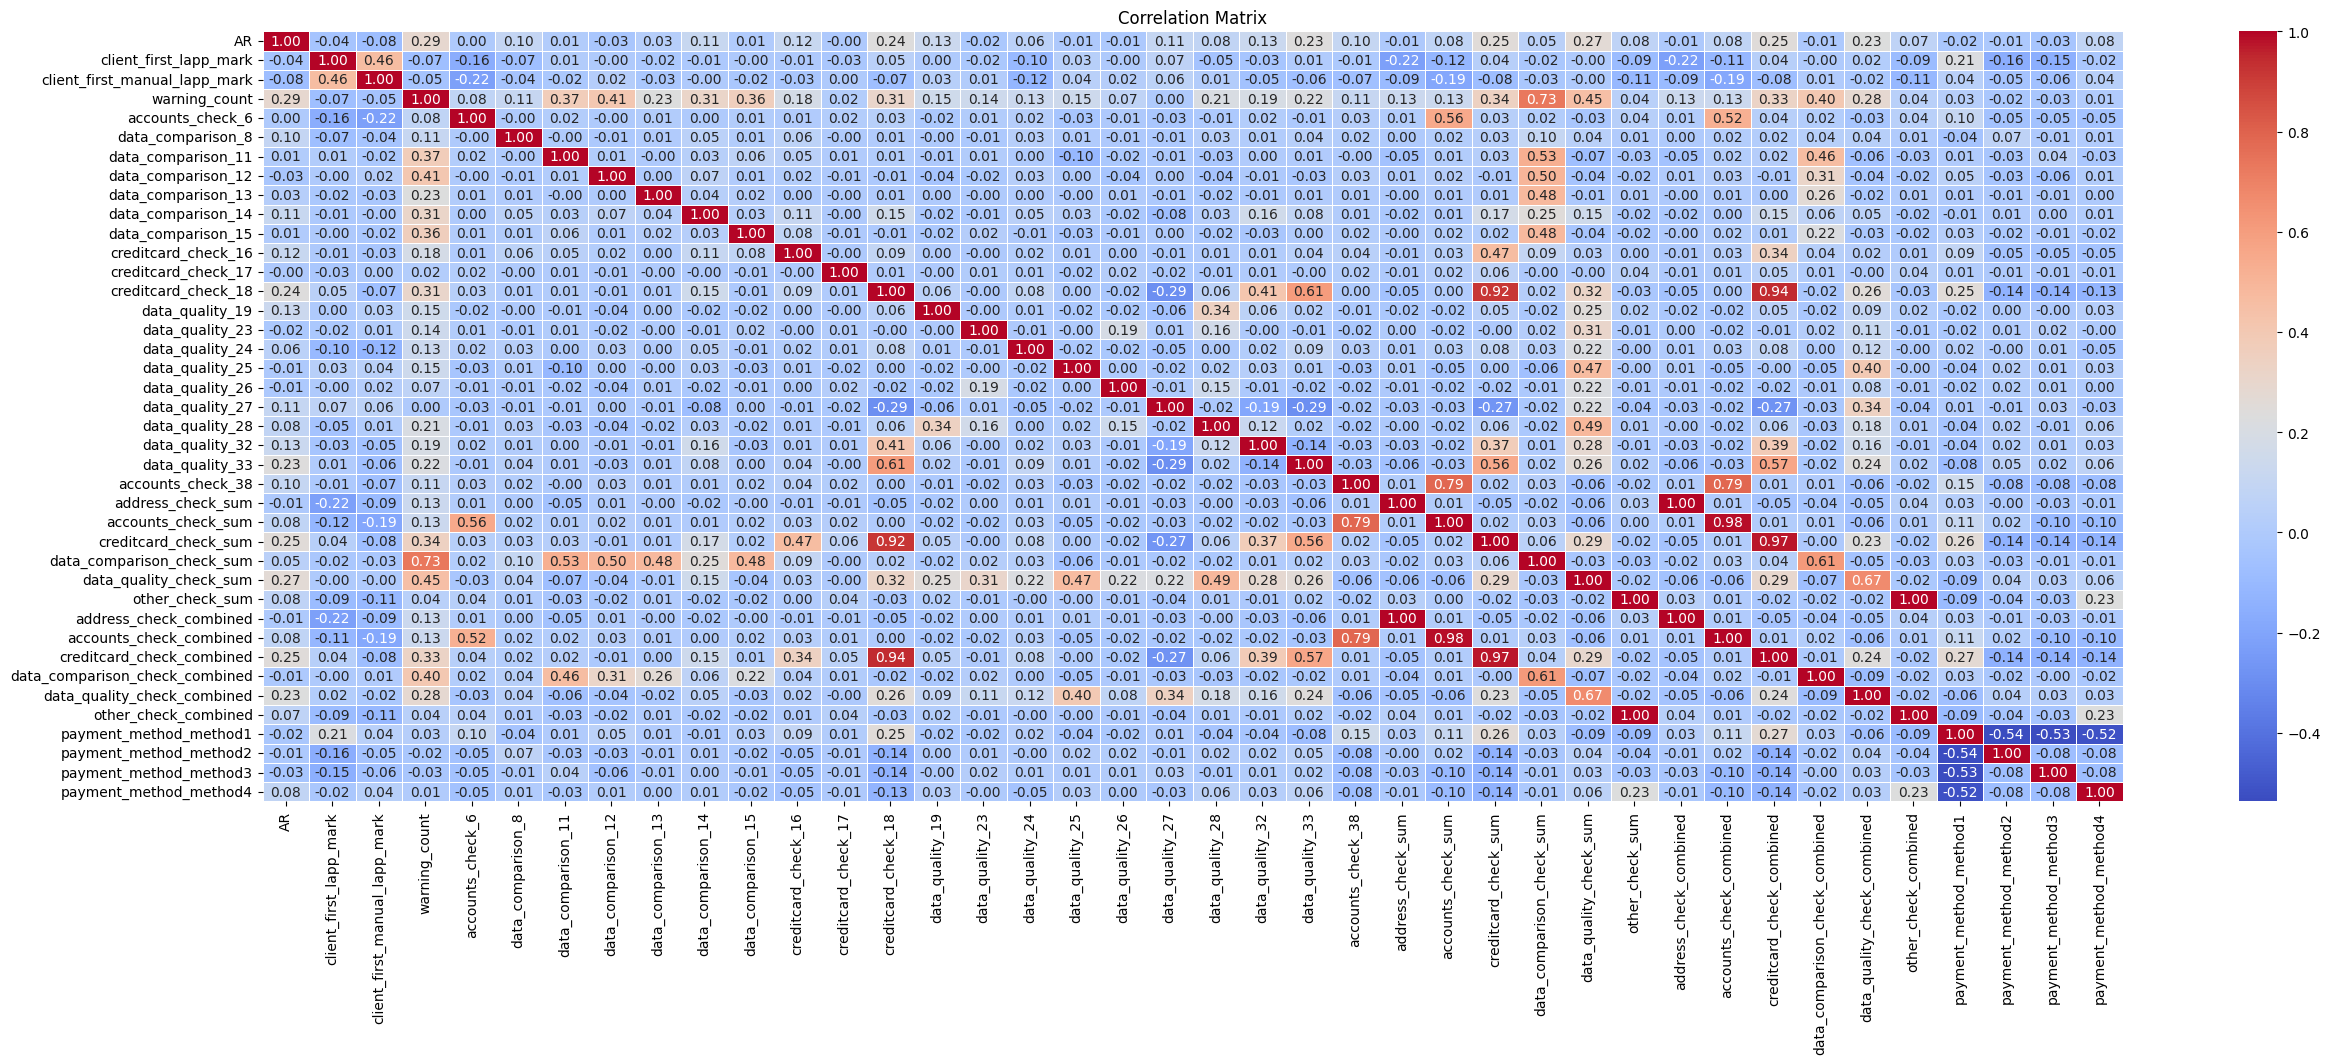

In [14]:
corr_df=data.copy()
label_encoder = LabelEncoder()

# encode the categorical columns
for category in categorical_features:
    if category !="payment_method":
        corr_df[category]= label_encoder.fit_transform(corr_df[category])
        

corr_df=pd.get_dummies(corr_df,dtype='int64')


corr_matrix = corr_df.corr()

create_heat_map(corr_matrix)
plt.show()



In [15]:
drop_combined_data_check_columns=['other_check_combined','creditcard_check_combined','accounts_check_combined','address_check_combined',"creditcard_check_18",'data_comparison_check_combined','data_quality_check_combined']
corr_df.drop(drop_combined_data_check_columns,axis=1,inplace=True)

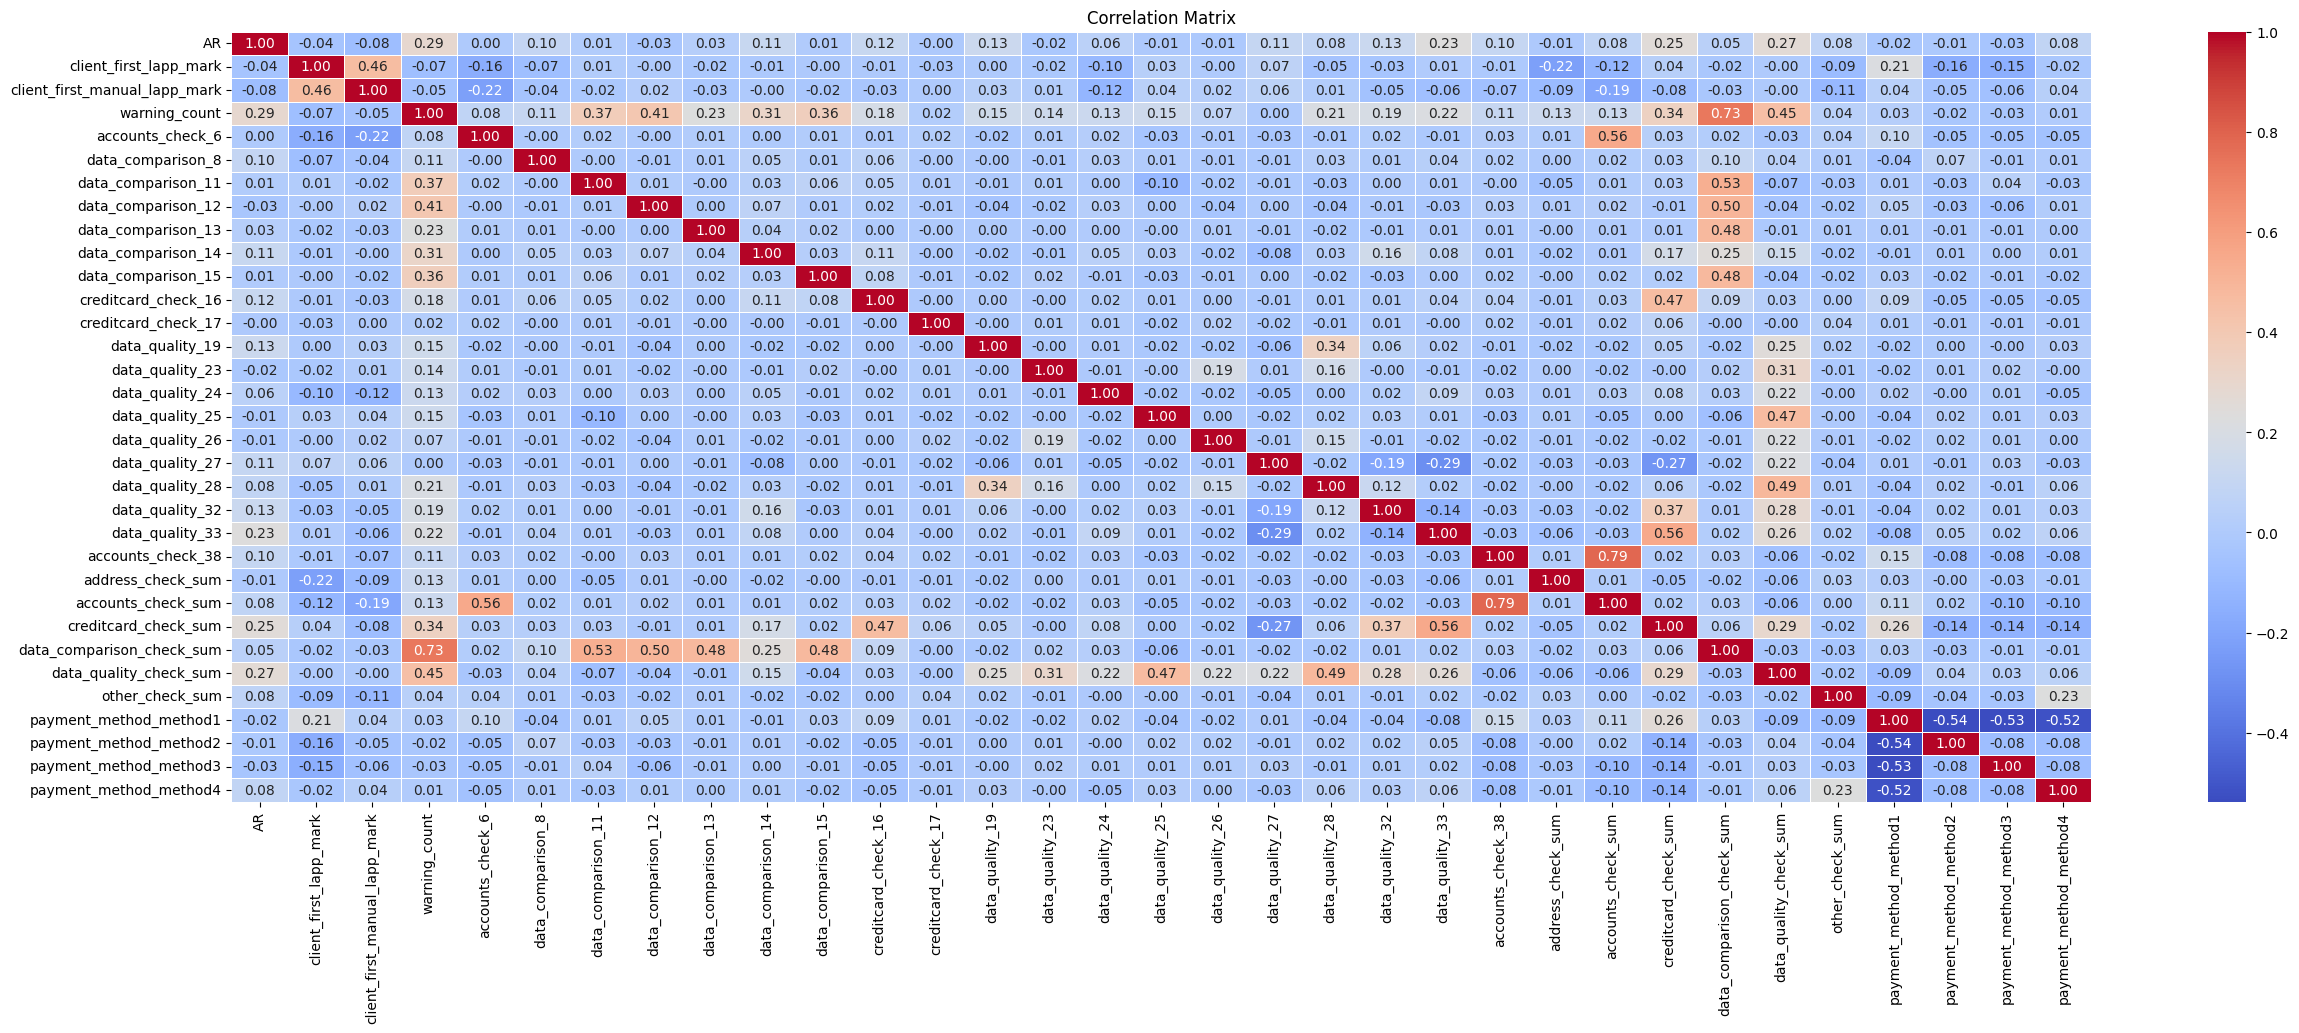

In [16]:
corr_matrix = corr_df.corr()

create_heat_map(corr_matrix)

plt.show()

### Feature Engineering

In [17]:
new_features = [
    ('warning_count', 'data_comparison_15'),
    ('warning_count', 'data_comparison_14'),
    ('warning_count', 'data_comparison_12'),
    ('warning_count', 'data_comparison_11'),

    
]
for feature in new_features:
    corr_df=combine_features(feature,corr_df)

In [18]:


corr_df.drop(['data_comparison_15','data_comparison_14','data_comparison_12',"data_comparison_11"], inplace = True,axis=1)
               
 

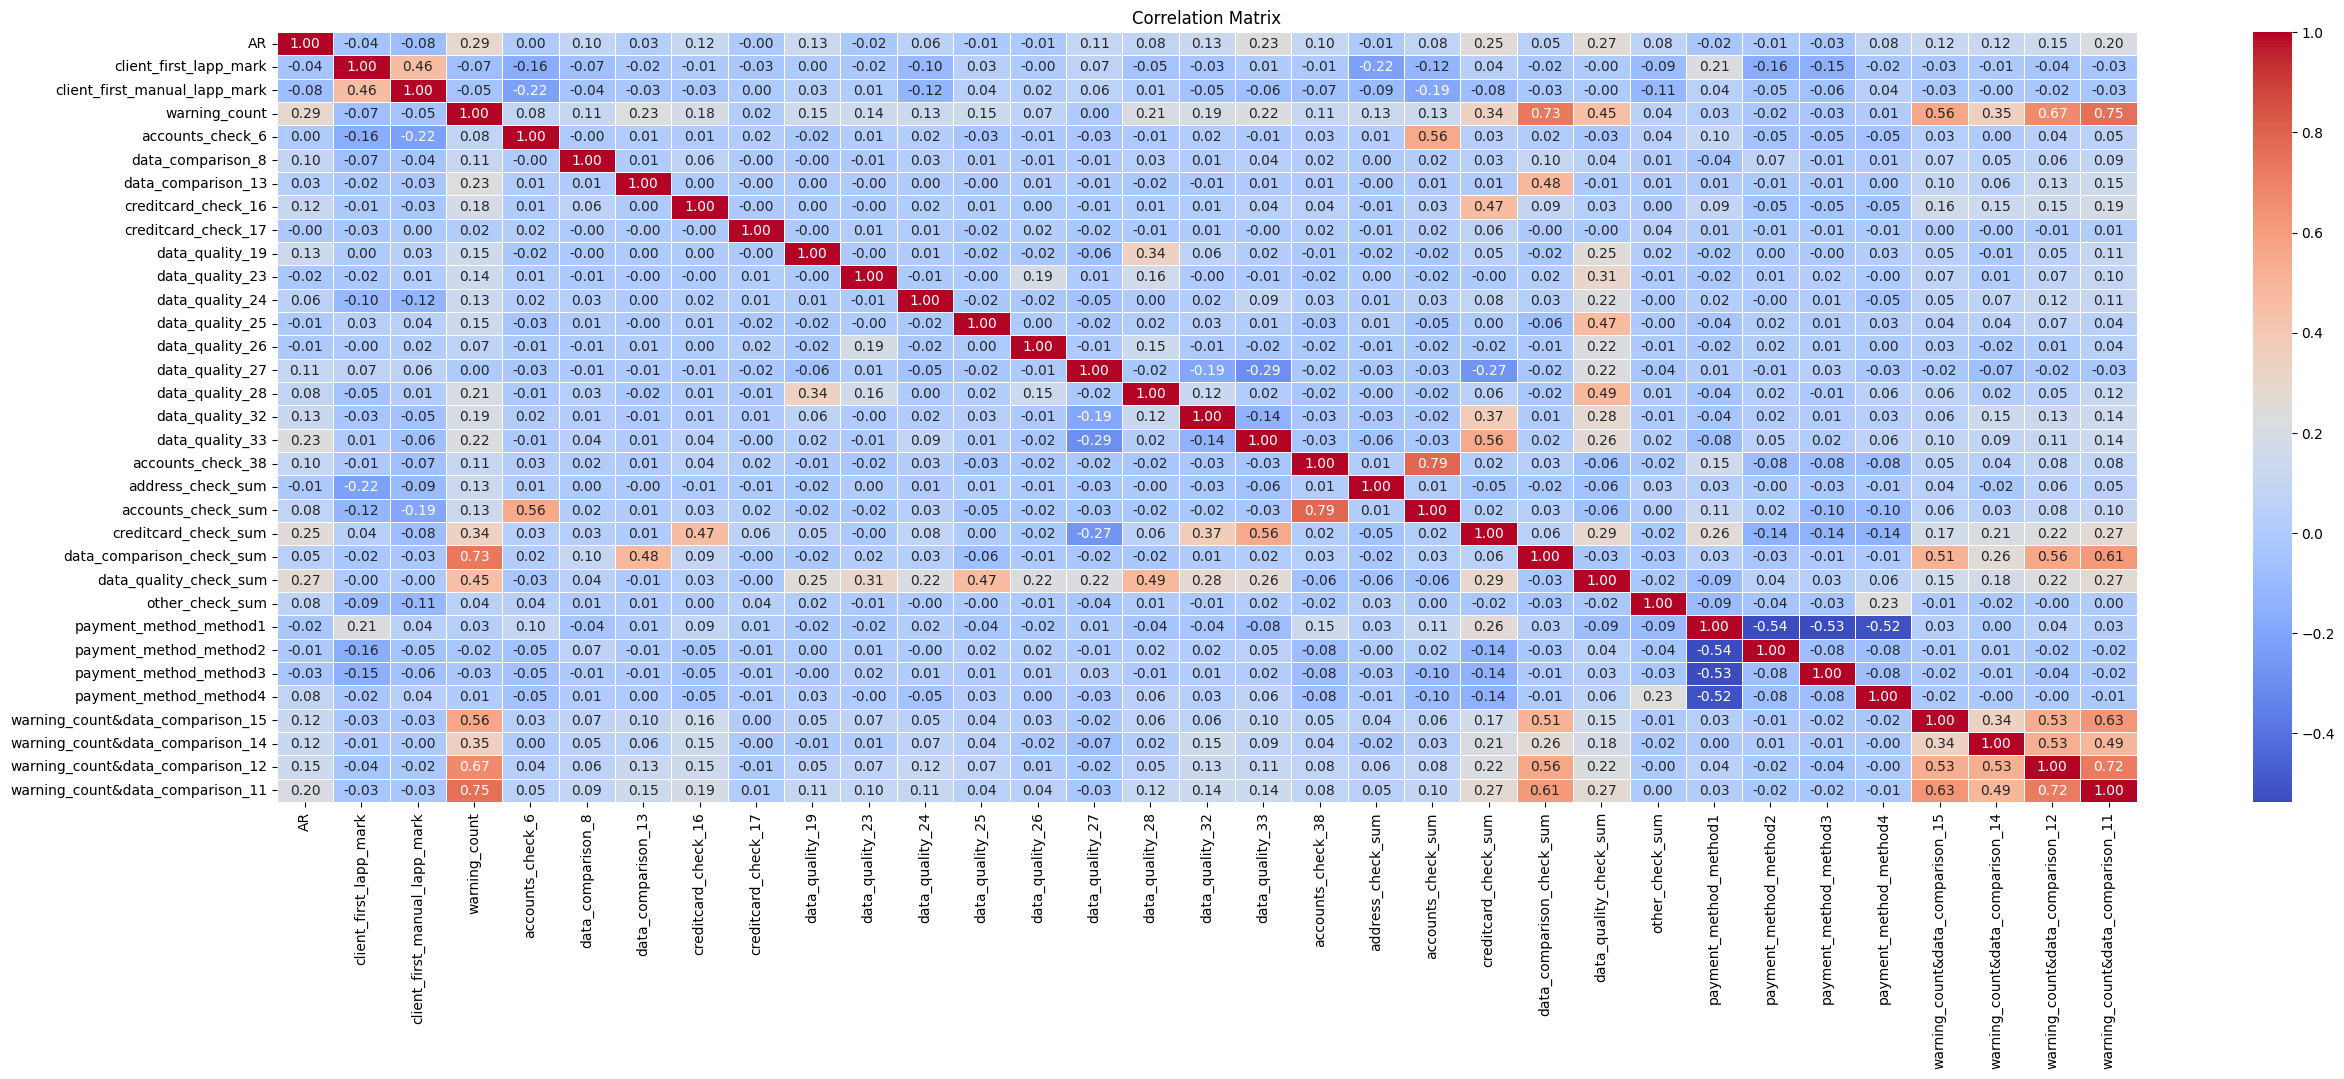

In [19]:

# encode the categorical columns
corr_df=pd.get_dummies(corr_df,dtype='int64')
corr_matrix = corr_df.corr()

create_heat_map(corr_matrix)
plt.savefig("../reports/figures/correlation_analysis.png")

plt.show()

## Findings Based on Correlation Coefficients

### Correlation Insights:
- **Positive Correlations:**
  - Variables such as `warning_count` (0.288), `creditcard_check_18` (0.237), and `creditcard_check_16` (0.117) show positive correlations with the `AR` target. These variables have higher coefficients and are more likely to have a meaningful relationship with the AR.
  - Other variables with positive but lower coefficients include `data_comparison_14`, `data_quality_27`, `accounts_check_38` ,`data_quality_28`,`client_first_manual_lapp_mark`,`data_quality_24`,`payment_method`,`client_first_lapp_mark`,`data_comparison_13`,`data_comparison_11`,`data_comparison_15`,`accounts_check_6`.

- **Negative Correlations:**
  - Variables with negative coefficients, such as `creditcard_check_17` (-0.003), `data_quality_25` (-0.006), `data_quality_26` (-0.010), `data_quality_23` (-0.017), and `data_comparison_12` (-0.032), indicate a weaker or potentially inverse relationship with the AR.

### Recommendations:

1. **Columns to Consider Removing:**
   - **Columns with Coefficients ≤ 0:** The following columns have correlation coefficients less than or equal to 0 and may not contribute positively to the model. These include:
     - `creditcard_check_17` (-0.003)
     - `data_quality_25` (-0.006)
     - `data_quality_26` (-0.010)
     - `data_quality_23` (-0.017)
     - `data_comparison_12` (-0.032)

   - **Rationale:** Since these variables show either a very weak or negative relationship with the AR, they may add noise or complexity to the model without providing meaningful predictive power. Removing these columns could simplify the model and potentially improve its performance.

2. **Columns to Retain:**
   - **Columns with Positive Coefficients:** Retain variables with positive coefficients, especially those with higher values, such as:
      - `warning_count` (0.288165)
      - `creditcard_check_18` (0.236820)
      - `creditcard_check_16` (0.116787)
      - `data_comparison_14` (0.111565)
      - `data_quality_27` (0.105229)
      - `accounts_check_38` (0.099393)
      - `data_quality_28` (0.084676)
      - `client_first_manual_lapp_mark` (0.078114)
      - `data_quality_24` (0.055244)
      - `payment_method` (0.047336)
      - `client_first_lapp_mark` (0.038801)
     
   - **Rationale:** These variables show a more meaningful positive correlation with the approval rate and are likely to provide useful information for predicting approvals.

In summary, consider removing columns with coefficients less than or equal to 0 as they may not contribute positively to the model. Focus on retaining and potentially further exploring variables with positive coefficients to enhance the model's predictive accuracy.


# Feature selection

In [20]:
corr_matrix['AR'].sort_values(ascending=False)

AR                                  1.000000
warning_count                       0.288165
data_quality_check_sum              0.267275
creditcard_check_sum                0.254806
data_quality_33                     0.234368
warning_count&data_comparison_11    0.204734
warning_count&data_comparison_12    0.145174
data_quality_19                     0.131360
data_quality_32                     0.128722
warning_count&data_comparison_14    0.120848
warning_count&data_comparison_15    0.120219
creditcard_check_16                 0.116787
data_quality_27                     0.105229
accounts_check_38                   0.099393
data_comparison_8                   0.098570
data_quality_28                     0.084676
payment_method_method4              0.082974
accounts_check_sum                  0.079557
other_check_sum                     0.075001
data_quality_24                     0.055244
data_comparison_check_sum           0.048782
data_comparison_13                  0.028304
accounts_c

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

X = corr_df.drop(columns=['AR'])
y = data['AR']

# Select top 10 features 
selector = SelectKBest(score_func=f_classif, k=25)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = (X.columns[selector.get_support()]).to_list()

print("Selected features:", selected_features)


Selected features: ['client_first_lapp_mark', 'client_first_manual_lapp_mark', 'warning_count', 'data_comparison_8', 'data_comparison_13', 'creditcard_check_16', 'data_quality_19', 'data_quality_24', 'data_quality_27', 'data_quality_28', 'data_quality_32', 'data_quality_33', 'accounts_check_38', 'accounts_check_sum', 'creditcard_check_sum', 'data_comparison_check_sum', 'data_quality_check_sum', 'other_check_sum', 'payment_method_method1', 'payment_method_method3', 'payment_method_method4', 'warning_count&data_comparison_15', 'warning_count&data_comparison_14', 'warning_count&data_comparison_12', 'warning_count&data_comparison_11']


In [22]:
model_selected_features=selected_features+["AR"]
model_selected_features

['client_first_lapp_mark',
 'client_first_manual_lapp_mark',
 'warning_count',
 'data_comparison_8',
 'data_comparison_13',
 'creditcard_check_16',
 'data_quality_19',
 'data_quality_24',
 'data_quality_27',
 'data_quality_28',
 'data_quality_32',
 'data_quality_33',
 'accounts_check_38',
 'accounts_check_sum',
 'creditcard_check_sum',
 'data_comparison_check_sum',
 'data_quality_check_sum',
 'other_check_sum',
 'payment_method_method1',
 'payment_method_method3',
 'payment_method_method4',
 'warning_count&data_comparison_15',
 'warning_count&data_comparison_14',
 'warning_count&data_comparison_12',
 'warning_count&data_comparison_11',
 'AR']

In [23]:

selected_data=corr_df[model_selected_features]
# selected_data=corr_df

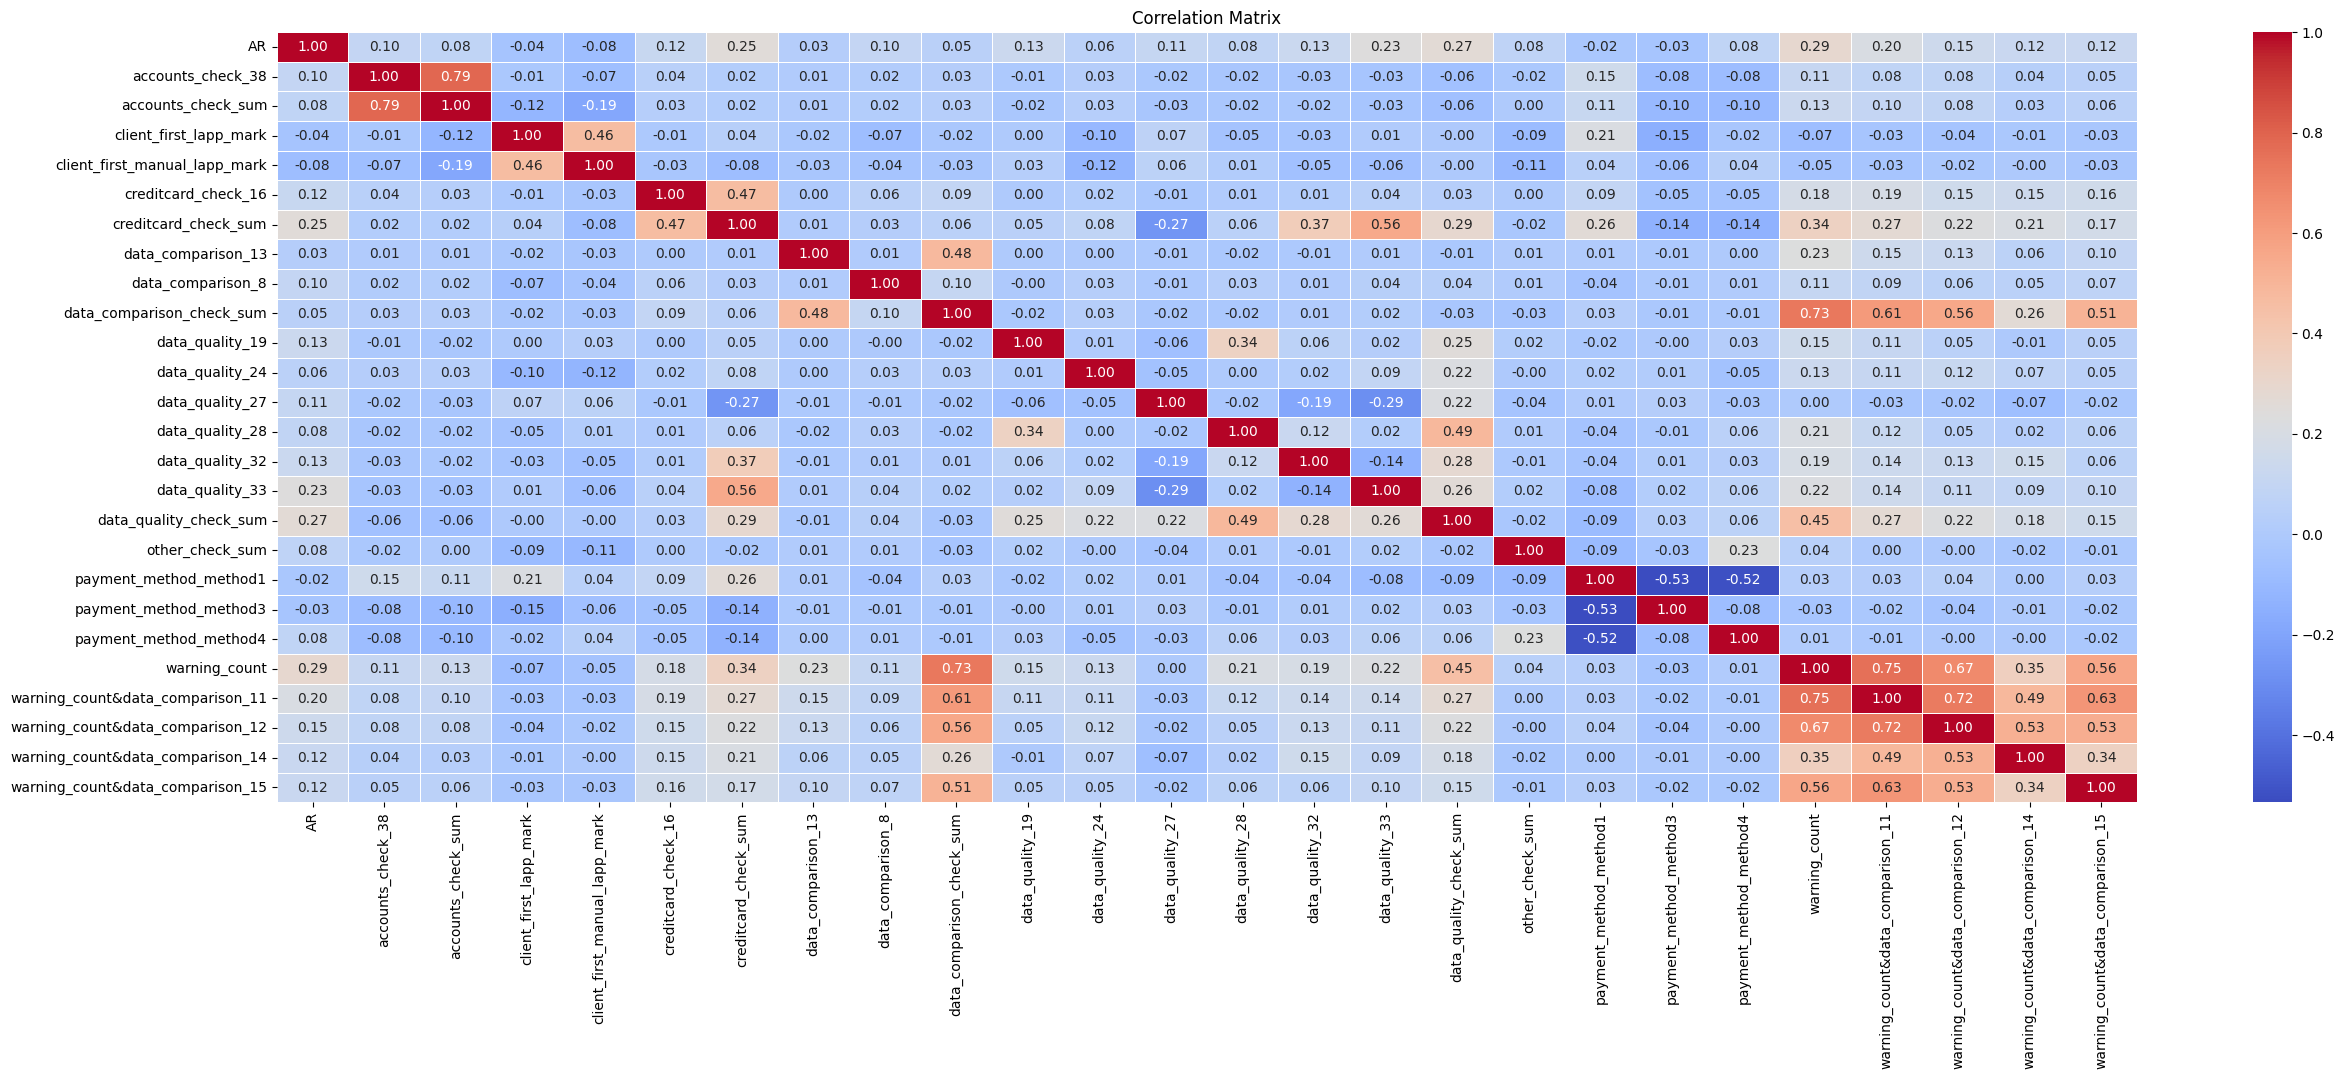

In [24]:

selected_matrix = selected_data.corr()
selected_matrix = selected_matrix.sort_index(axis=0).sort_index(axis=1)

create_heat_map(selected_matrix)
plt.savefig("../reports/figures/selected_correlation_analysis.png")

plt.show()

In [25]:
import warnings
warnings.filterwarnings("ignore")
new_features = [
    ('creditcard_check_18', 'data_quality_32'),
    ('creditcard_check_18', 'data_quality_33'),
    ('data_quality_19', 'data_quality_28')    
]
for feature in new_features:
    new_feature_name="&".join(feature)
    selected_data[new_feature_name]=data[feature[0]].astype(int)+data[feature[1]].astype(int)



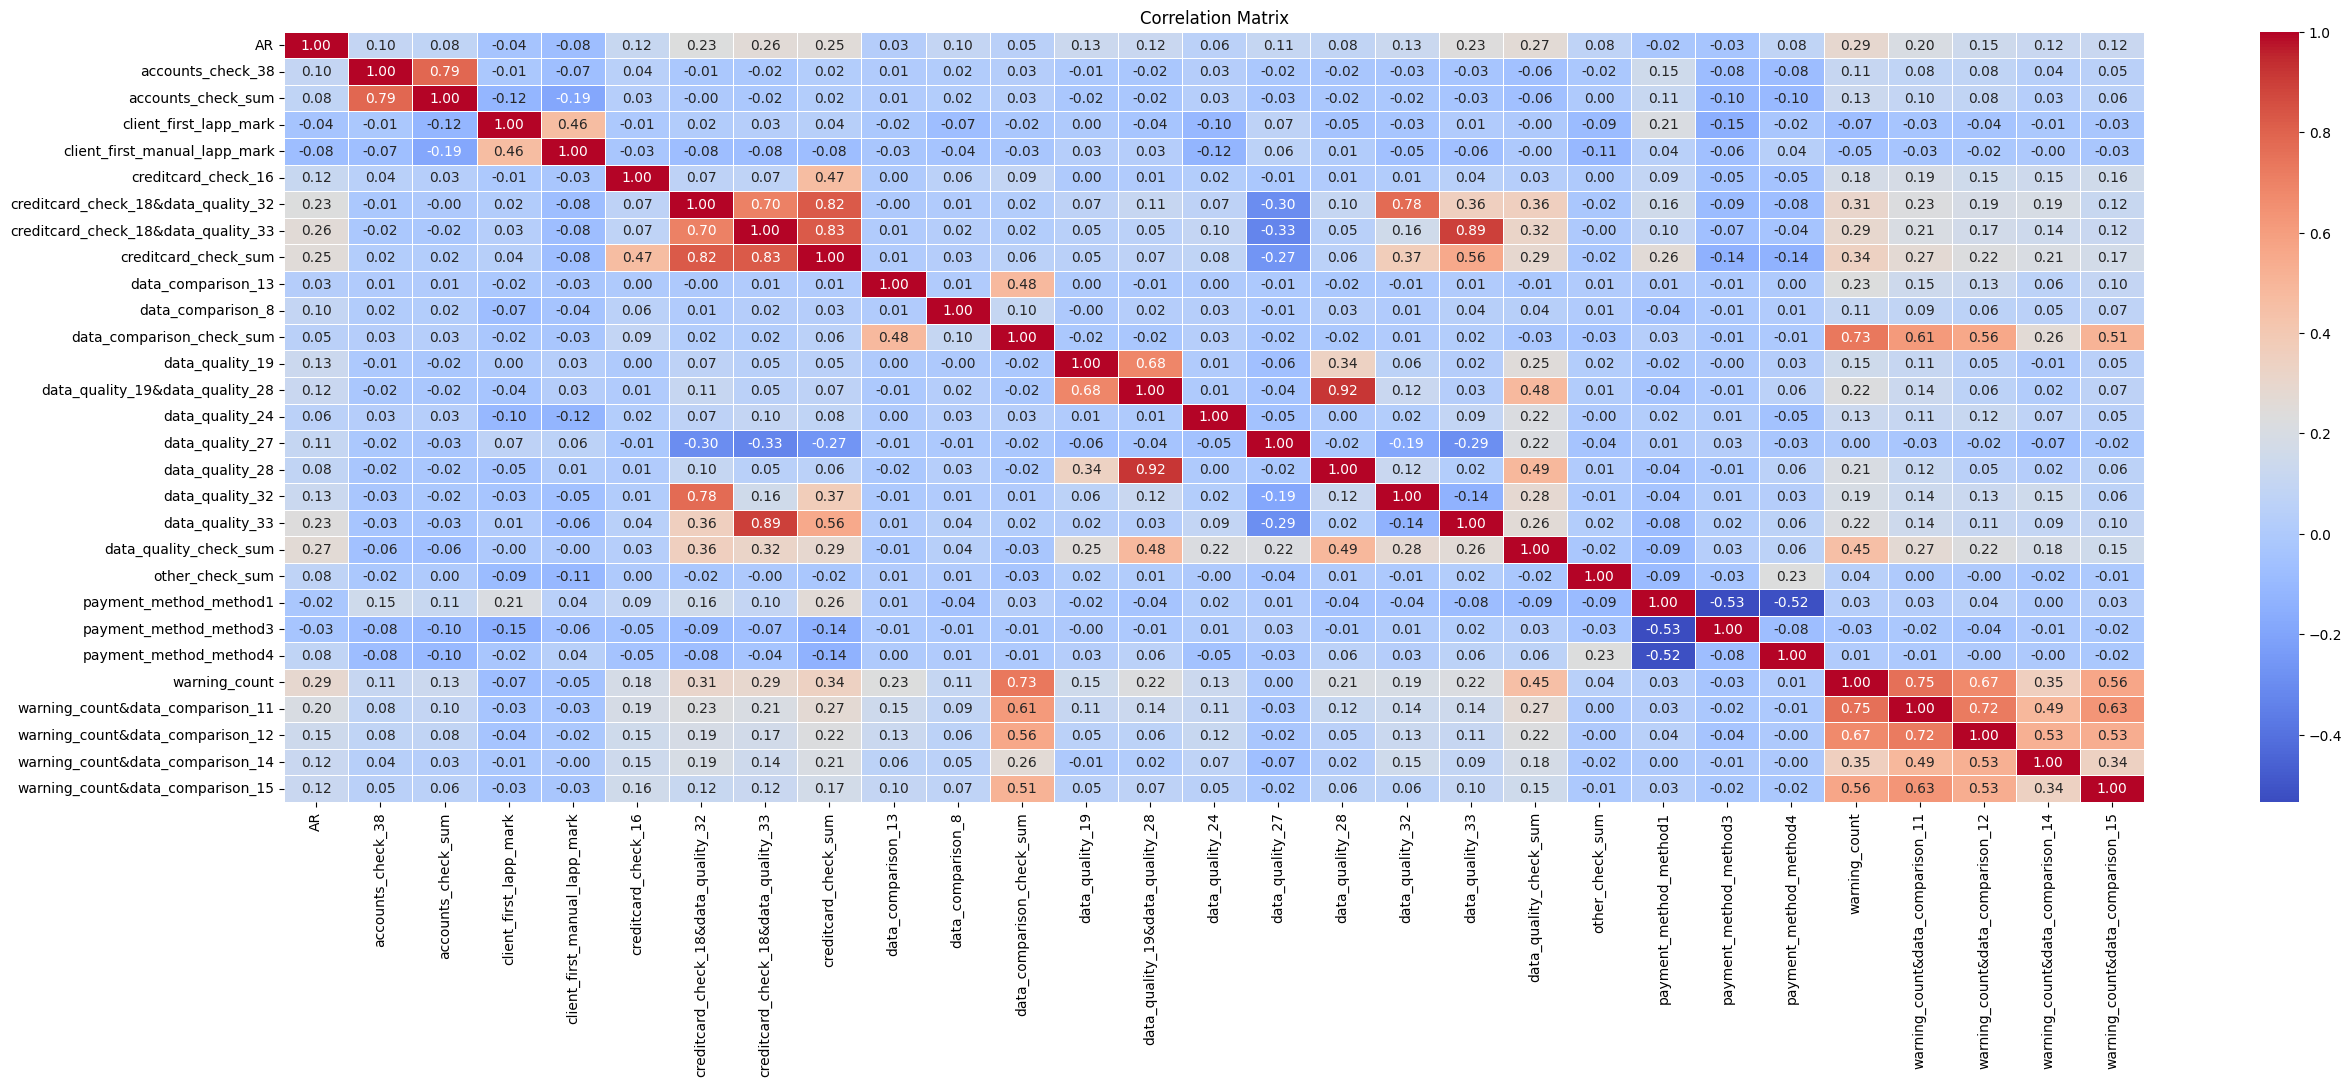

In [26]:
selected_matrix = selected_data.corr()
selected_matrix = selected_matrix.sort_index(axis=0).sort_index(axis=1)

create_heat_map(selected_matrix)
plt.savefig("../reports/figures/selected_correlation_analysis.png")

plt.show()

In [27]:
selected_data.to_csv("../data/processed/data_features_selected.csv",index=False)